# **Week #2 - Fraud Detection and Prevention**

Fraud Analytics - Sekolah Data - Pacmann Academy

---
**Objectives**

- You can grasp the general idea of fraud prevention
- You can perform quick fraud detection as prevention solution


---
**Outline**

1. Business Understanding
2. Importing Data
3. Splitting Data
4. Exploratory Data Analysis
5. Fraud Detection
6. Evaluations
7. ROI Calculation of Models
8. Fraud Detection as Preventive Solution
9. Conclusion

Run this cell first!

In [4]:
#%pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# <font color='blue'> 1. Business Understanding
---

Vehicle insurance claim process illustration


<details>
    <summary><b>Click to Show</b></summary>
    <div>
      <img src="https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-fraud-analytics/Untitled_Diagram.drawio_12.png" width="700">
    </div>
</details>

---

- The general process of vehicle insurance claim:
  1. User make claim request. Usually by phone or email
  2. The surveyor will check all the document related and record details of vehicle and the damage from accident if any.
  3. All the document and records detail will be assessed to get
     - The validity of claim
     - The elligibility of claim
     - The amount of claim
4. The claim might be rejected if:
   - The user does not provide all the necessary documents as per the insurer's requirements
   - The claim does not falls within the covered scope. e.g. the driver was drunk, the car has some modifications from the original conditions when it was registered.


- Are there any potential problem in this business process? mainly relating to fraud

## 1.1 Business Objective
---|

- Decrease the amount of loss by preventing the fraudulent claim

## 1.2 Data Description


- We will use vehicle insurance claim dataset from [Vehicle Insurance Claim - Kaggle](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection?resource=download)
- We will only use several columns related to accident, `PoliceReportFiled` and policy detail, `NumberOfSuppliments`, the amount of money the insured person must pay `Deductible` and the target variable, `FraudFound_P`

<center>

|Feature|Type|Desc|
|:--|:--|:--|
|`PoliceReportFiled`|`binary`|The condition of formal document filed that details all of the circumstances, timeline, and facts of an event surrounding an (often illegal) incident.|
|`NumberOfSuppliments`|`categorical`|The number of additional request to insurance company for funds beyond the original estimate.|
|`Deductible`|`numerical`|The amount of money that the insured person must pay before their insurance policy starts paying for covered expenses.|
|`FraudFound_P` (**target variable**)|`binary`|The target variable and it takes value 1 in case of fraud and 0 otherwise.|

## 1.3 Define the Problem


- We are facing two problems
  - If we incorrectly predict fraud transaction as not fraud, we will loss due to the fraud.
  - If we incorrectly predict not fraud transaction as fraud, we will loss the customer.

- Hence, we create a model to **classify** between fraud and not fraud

Model descriptions:

1. **What are the inputs?** Insurance claim records, `PoliceReportFiled`, `NumberOfSuppliments`, `Deductible`

2. **What are the outputs?** `FraudFound_P` prediction,
      - It takes value `1` in case of predicted as fraud, and
      - `0` otherwise.

3. **What do we do with the prediction?** If a transaction is flagged as suspicious, the decision maker may decide:
   - Flag claim as suspicious AND
   - Alert fraud investigation officer.

## 1.4 Task
---

- **Task:**
  - Fraudulent insurance claim classification

- **Technique used:**
  - Baseline: all transaction is not fraudulent
  - Expert-based (a ruled-based)
  - Statistics-based

- **Evaluation:**
  - Accuracy, Precision and Recall
  - Business Cost & ROI

# <font color='blue'> 2. Importing Data
___

In [12]:
# read dataset function
def read_data(path):
    """
    Reads a CSV file at the given path, removes any duplicate rows,
    and returns its contents as a pandas DataFrame.

    Parameters
    ----------
    path : str
        The sample data input path (csv format)

    Return
    ------
    df : pd.DataFrame
        The sample data input
    """
    # Read data
    df = pd.read_csv(path)

    # Validate
    print('Data shape:', df.shape)

    return df

In [17]:
# Dataset name / Path
path = 'fraud_oracle.csv'

# Read the data
df_original = read_data(path = path)
df_original.head()

Data shape: (15420, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [18]:
selected_col = ["PoliceReportFiled","NumberOfSuppliments","Deductible","FraudFound_P"]

In [19]:
df = df_original[selected_col]

In [20]:
df.head()

,PoliceReportFiled,NumberOfSuppliments,Deductible,FraudFound_P
0,No,none,300,0
1,Yes,none,400,0
2,No,none,400,0
3,Yes,more than 5,400,0
4,No,none,400,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PoliceReportFiled    15420 non-null  object
 1   NumberOfSuppliments  15420 non-null  object
 2   Deductible           15420 non-null  int64 
 3   FraudFound_P         15420 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 482.0+ KB


# <font color='blue'> 3. Splitting Data
    
___

- Our objective is to classify unseen transactions data, thus we need to make sure that we do not leak unseen transactions data during training.
- Our tasks:
  1. Split into `input` (`X`) and `output` (`y`)
  2. Split into `train` (60% data), `valid` (20% data), and `test` (20% data).
    - `train` data: will be used to build the technique
    - `validation` data: will be used to choose the best technique
    - `test` data: will be used for final evaluation

In [23]:
# function split input and output
def split_input_output(data, target_column):
    """
    Function to split input (x) and output (y)

    Parameters
    ----------
    data : pd.DataFrame
        The sample data input

    target_column : str
        The output column name

    Return
    ------
    X : pd.DataFrame
        input data

    y : pd.DataFrame
        output data
    """
    X = data.drop(columns = target_column)
    y = data[target_column]

    # Validate
    print('X shape:', X.shape)
    print('y shape :', y.shape)

    return X, y


In [24]:
# Split input x and output y
X, y = split_input_output(data = df,
                          target_column = "FraudFound_P")

# Show 5 first rows of input
X.head()

X shape: (15420, 3)
y shape : (15420,)


,PoliceReportFiled,NumberOfSuppliments,Deductible
0,No,none,300
1,Yes,none,400
2,No,none,400
3,Yes,more than 5,400
4,No,none,400


**Validate the Data Dimension**

we want to validate whether the data dimensions are in accordance with the data standards in the data definition process

In [26]:
# check data dimension
n_samples, n_features = X.shape

# print number samples and features
print(f"Number of samples  : {n_samples}")
print(f"Number of features : {n_features}")

Number of samples  : 15420
Number of features : 3


In [27]:
# check data features name
features_names = X.columns

# print name of features
print(f"name of features : {features_names}")

name of features : Index(['PoliceReportFiled', 'NumberOfSuppliments', 'Deductible'], dtype='object')


**Split Train, Valid, and Test**

- Create a function to split train-valid-test

In [29]:
from sklearn.model_selection import train_test_split

def split_train_valid_test(X, y, test_size, valid_size, stratify, random_state=42):
    """
    Split data into train & test

    Parameters
    ----------
    X : pd.DataFrame
        The input data

    y : pd.Series
        The output data

    test_size : float
        The proportion of number of test data to total data

    valid_size : float
        The proportion of number of validation data to total data

    stratify : pd.Series
        Reference to stratify the splitting

    random_state : int, default=42
        The random seed, for reproducibility

    Returns
    -------
    X_train : pd.DataFrame
        The input train data

    X_test : pd.DataFrame
        The input test data

    y_train : pd.Series
        The output train data

    y_test : pd.Series
        The output test data
    """
    # Split the data
    X_train, X_not_train, y_train, y_not_train = train_test_split(
        X,
        y,
        test_size = test_size + valid_size,
        stratify = stratify,
        random_state = random_state
    )

    # Then, split valid and test from not_train
    X_valid, X_test, y_valid, y_test = train_test_split(
        X_not_train,
        y_not_train,
        test_size = valid_size/(test_size + valid_size),
        stratify = y_not_train,
        random_state = random_state
    )

    # Validate
    print('X train shape:', X_train.shape)
    print('y train shape:', y_train.shape)
    print('X valid shape :', X_valid.shape)
    print('y valid shape :', y_valid.shape)
    print('X test shape :', X_test.shape)
    print('y test shape :', y_test.shape)

    return X_train, X_valid, X_test, y_train, y_valid, y_test


In [30]:
# Run the code
splitted_data = split_train_valid_test(
    X = X,
    y = y,
    test_size = 0.2,
    valid_size = 0.2,
    stratify = y,
    random_state = 42
)

X_train, X_valid, X_test, y_train, y_valid, y_test = splitted_data

X train shape: (9252, 3)
y train shape: (9252,)
X valid shape : (3084, 3)
y valid shape : (3084,)
X test shape : (3084, 3)
y test shape : (3084,)


**Summary**
- Now we have training, validation and testing data
  - test_size = 20% from original data,
  - validation_size = 20% from original data,
  - train_size = 60% from original data

- We will focus on training data in EDA

# <font color='blue'> 4. Exploratory Data Analysis


- Ideally, we perform EDA to get to know the data better by
  - Finding the data distribution / correlation
  - Finding the outlier
  - Finding how to impute missing values
  - etc.

- In this session, we:
  - Check for statistics decriptives
  - Check for missing values
  - Check for data distribution

- Then, we can plan for preprocessing if need

In [33]:
# Print train set shape
print('X train shape:', X_train.shape)
print('y train shape:', y_train.shape)

X train shape: (9252, 3)
y train shape: (9252,)


In [34]:
# create EDA dataset
eda_df = pd.concat([X_train, y_train],
                   axis=1)
eda_df.head()

,PoliceReportFiled,NumberOfSuppliments,Deductible,FraudFound_P
2839,No,more than 5,400,0
5783,No,none,400,0
10425,No,none,400,0
10966,No,none,400,0
14520,No,more than 5,400,0


In [35]:
# Print train set shape after concat
print('eda_df shape:', eda_df.shape)

eda_df shape: (9252, 4)


## 4.1 Check for statistics descriptives


In [38]:
# Check unique valkues, and top frequecies
eda_df.describe(include = ["O"])

,PoliceReportFiled,NumberOfSuppliments
count,9252,9252
unique,2,4
top,No,none
freq,8995,4177


In [39]:
# Check min, max and quartile values
eda_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Deductible,9252.0,408.365759,46.301417,300.0,400.0,400.0,400.0,700.0
FraudFound_P,9252.0,0.059879,0.237275,0.0,0.0,0.0,0.0,1.0


**Summary**
- The `PoliceReportFiled` and `NumberOfSuppliments` are categories
- `PoliceReportFiled` has 2 unique values and `NumberOfSuppliments` has 4 unique values
- Most of the claim has no police report, and no suppliments
- The amount of claim's minimum is positive, and has third quantile that's not far from the maximum value

In [42]:
eda_df["PoliceReportFiled"].value_counts()

PoliceReportFiled
No     8995
Yes     257
Name: count, dtype: int64

In [44]:
eda_df.groupby("PoliceReportFiled").count()

,NumberOfSuppliments,Deductible,FraudFound_P
PoliceReportFiled,,,
No,8995,8995,8995
Yes,257,257,257


## 4.2 Check for missing values
___

In [45]:
eda_df.isna().sum()

PoliceReportFiled      0
NumberOfSuppliments    0
Deductible             0
FraudFound_P           0
dtype: int64

## 4.3 Check for Distribution


**Class proportion**

In [47]:
eda_df["FraudFound_P"].value_counts(normalize = True)

FraudFound_P
0    0.940121
1    0.059879
Name: proportion, dtype: float64

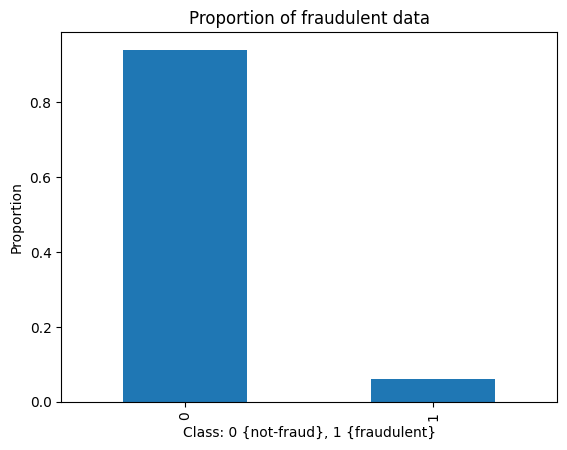

In [48]:
# Plot
(
    eda_df["FraudFound_P"]
    .value_counts(normalize = True)
    .plot
    .bar()
)

plt.xlabel("Class: 0 {not-fraud}, 1 {fraudulent}")
plt.ylabel("Proportion")
plt.title("Proportion of fraudulent data")
plt.show()

Only 5.9% fraud found in training data (which is good!, what happen if the company has the other way around?)

Check whether any difference in input variables related to the output

**PoliceReportFiled**

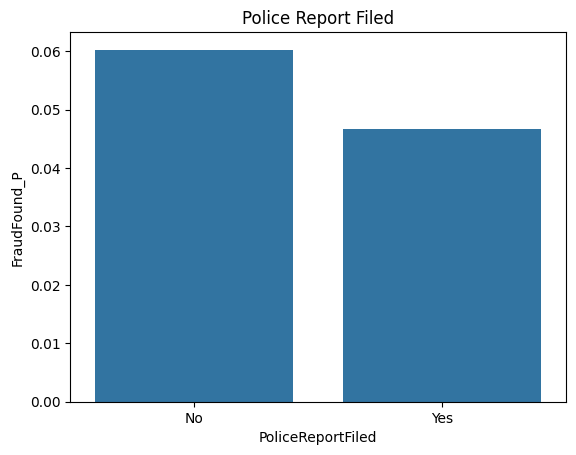

In [51]:
# Visualize the PoliceReportFiled
sns.barplot(data = eda_df,
            x = "PoliceReportFiled",
            y = "FraudFound_P",
            errorbar = None)

plt.title("Police Report Filed")
plt.show()

Accident with no police report filed have higher probability comitting fraud than accident with police report filed

**NumberOfSuppliments**

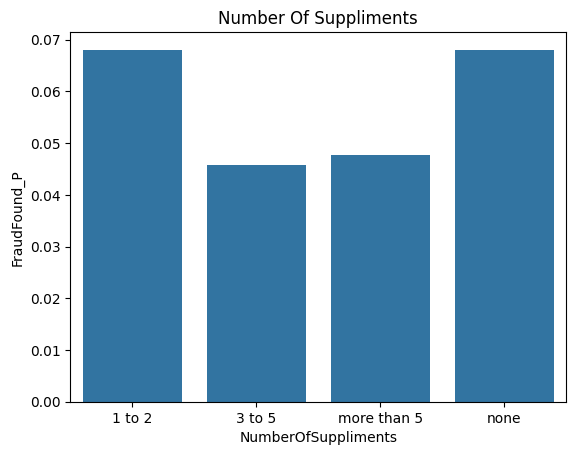

In [54]:
# Visualize the NumberOfSuppliments
sns.barplot(data = eda_df,
            x = "NumberOfSuppliments",
            y = "FraudFound_P",
            errorbar = None,
           order=sorted(eda_df['NumberOfSuppliments'].unique())
           )

plt.title("Number Of Suppliments")
plt.show()

In [56]:
eda_df['NumberOfSuppliments'].value_counts()

NumberOfSuppliments
none           4177
more than 5    2368
1 to 2         1484
3 to 5         1223
Name: count, dtype: int64

In [58]:
 a= pd.crosstab(eda_df['NumberOfSuppliments'],eda_df['FraudFound_P'])

In [72]:
a["perc_fraud"] = a[1]/(a[0]+a[1])

In [73]:
a

FraudFound_P,0,1,perc_fraud
NumberOfSuppliments,,,
1 to 2,1383,101,0.068059
3 to 5,1167,56,0.045789
more than 5,2255,113,0.047720
none,3893,284,0.067991


In [75]:
a.loc["1 to 2",:]

FraudFound_P
0             1383.000000
1              101.000000
perc_fraud       0.068059
Name: 1 to 2, dtype: float64

The lesser the number of suppliments, the higher probability comitting fraud. (it does not make sense, if the fraudster wants high return, they should have high number of suppliments, hmm what happen? need additional analysis)

**Deductible**

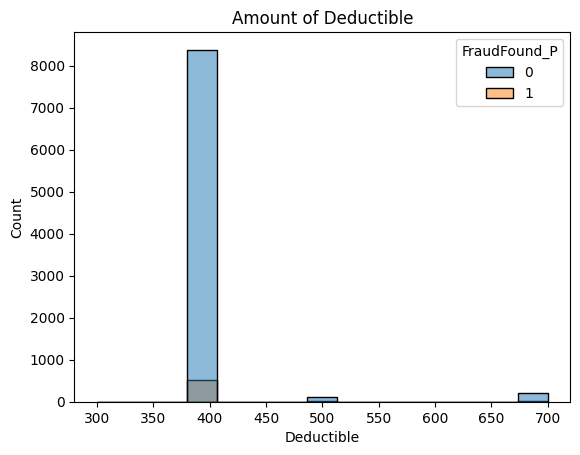

In [77]:
# Visualize the Deductible
sns.histplot(data = eda_df,
            x = "Deductible",
            hue = "FraudFound_P")

plt.title("Amount of Deductible")
plt.show()

It seems the value of deductible has some certain values

In [78]:
# Check values of deductible
eda_df.groupby("FraudFound_P")["Deductible"].value_counts()

FraudFound_P  Deductible
0             400           8378
              700            199
              500            117
              300              4
1             400            514
              500             28
              700             12
Name: count, dtype: int64

It takes values only in 300, 400, 500, 700

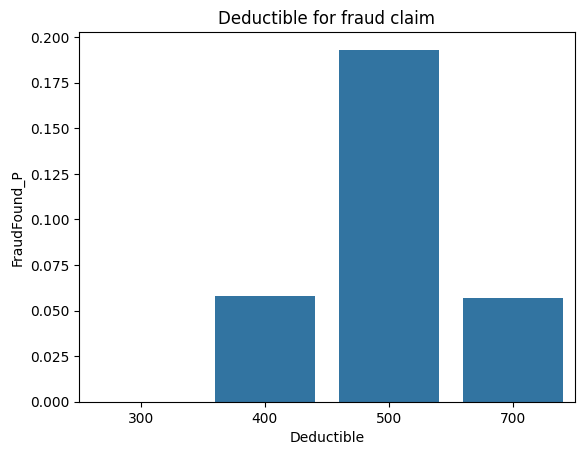

In [79]:
# Visualize the Deductible using Barplot to see their proportion of each class clearly
sns.barplot(data = eda_df,
            x = "Deductible",
            y = "FraudFound_P",
            errorbar = None)

plt.title("Deductible for fraud claim")
plt.show()

The deductible of 500 have higher probability than other values

**EDA Summary**

- Most of cases are non fraudelent, only 5.9% are fraud
- No missing values found in the data
- The target feature is not separable by all columns we have.
- There's no other data preprocessing step we need

# <font color='blue'> 5. Fraud Detection


To detect the fraud, we use three approaches:
1. Naive prediction
2. Expert-based prediction
3. Statistics-based prediction

Then, we model and evaluate the model

## **5.1 Naive Prediction - Baseline Model**
---

- We define the baseline model as 'naive' because we predict all the input data as the most frequent class of the training data.

- Example:
  - If our training data has <br>
<center>

    |Class|Class Proportion|
    |:--:|:--:|
    |`0`|0.94|
    |`1`|0.06|

</center>

  - The most frequent class = `0`
  - So we predict all the input as `0`

- We can use `DummyClassifier` to model it.

In [84]:
# Import DummyClassifier from Sklearn Library
from sklearn.dummy import DummyClassifier

## **5.2 Expert Based**
---

- Based on their experience & expertise, it is defined that a transaction is categorized as **fraud**

  IF:
  - No police report, OR
  - Have high number of suppliments

  THEN:
  - Flag claim as suspicious AND
  - Alert fraud investigation officer.

- We can create model to flag according to the expert rules.

In [85]:
# Create a model
class ExpertBased:
    """
    Flag fraud using expert rules
    The rules:
        - if `PoliceReportFiled` is "No", OR
             `NumberOfSuppliments` is "more than 5"
          then return 1 (fraud)
        - else return 0 (not fraud)
    """
    def fit(self, X, y):
        # Fitting the model
        # No need to do anyting
        pass

    def predict(self, X):
        # Predict using the expert rules

        cond_policereport = (X['PoliceReportFiled'] == "No")
        cond_suppliments = (X['NumberOfSuppliments'] == "more than 5")
        y_pred = (cond_policereport & cond_suppliments).astype(int)

        return y_pred


## **5.3 Statistics Based - IQR**
---

- We use the IQR approach to define which data is *far from normal*, because is most likely to be fraud.
- In this model, we only use the `Deductible` column.


<center>
<img src="https://miro.medium.com/max/720/1*0MPDTLn8KoLApoFvI0P2vQ.webp">
<br>
<a href="https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21">source</a>
</center>



- From the figure, we have the minimum and maximum value that potential as the threshold
  - Flag the fraudulent transaction if **below the minimum value**, or **exceed the maximum value**
  - We will use the maximum only as the upper bound threshold since the column we will use is the `Amount` of transaction
  - We will not use the minimum value as the lower bound since in common sense, the fraudster would not get profit from the transaction that is very small, below the minimum value or might be negative.

In [87]:
class IQRThreshold:
    """
    Flag fraud using IQR threshold
    """
    def fit(self, X, y):
        # Here we calculate the IQR of column deductible
        # Select col
        X = X["Deductible"].copy()

        # Extract Q1, Q3, and then IQR
        q1 = np.quantile(X, 0.25)
        q3 = np.quantile(X, 0.75)
        iqr = q3-q1

        # Obtain the threshold
        self.threshold = q3 + (1.5*iqr)

    def predict(self, X):
        # Predict using the given threshold
        y_pred = (X["Deductible"] > self.threshold).astype(int)

        return y_pred


# <font color='blue'> 6. Evaluations


- To evaluate the model, first we need summarize the prediction results, (aka. the confusion matrix).

<center>

||Predicted Fraud (`1`)|Predicted not Fraud (`0`)|
|--:|:--:|:--:|
|**Actual Fraud** (`1`)|True Positive (TP) - Correct!|False Negative (FN) - Wrong!|
|**Actual not Fraud** (`0`)|False Positive (FP) - Wrong!|True Negative (TN) - Correct!|

</center>

- After summarizing, we can calculate several metrics such as : `accuracy`, `precision`, `recall`, or `custom metrics`

In [89]:
# Create a function to summarize prediction results
def cross_tab(y_act, y_pred):
    """
    Summarize the prediction results

    Parameters
    ----------
    y_act : array-like
        The true target (y actual)

    y_pred : array-like
        The predicted

    Return
    ------
    crosstab_table : pd.DataFrame
        The crosstab table (confusion matrix)
        [[TP, FN],
         [FP, TN]]
    """
    # Extract the prediction
    fp = np.sum((y_act == 0) & (y_pred == 1))  # False positive
    tp = np.sum((y_act == 1) & (y_pred == 1))  # True positive
    fn = np.sum((y_act == 1) & (y_pred == 0))  # False negative
    tn = np.sum((y_act == 0) & (y_pred == 0))  # True negative

    # Summarize
    crosstab_table = pd.DataFrame(
        data = [[tp, fn], [fp, tn]],
        columns = ["Predicted Fraud", "Predicted Non Fraud"],
        index = ["Actual Fraud", "Actual Non Fraud"]
    )

    return crosstab_table


## 6.1 Training Set


Let's create the model

### **1. Naive Model - Baseline**
___

- Create the model

In [91]:
# Create model object
base_clf = DummyClassifier(strategy = "most_frequent")

# Fit model on Train data
base_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

- Get the prediction

In [93]:
# Predict
y_pred_train_base = base_clf.predict(X_train)
y_pred_train_base

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
np.unique(y_pred_train_base)

# See, all the data are predicted as the most frequent class, i.e. 0

array([0], dtype=int64)

- Next, summarize the prediction results

In [97]:
eval_base = cross_tab(y_act = y_train,
                      y_pred = y_pred_train_base)

eval_base

,Predicted Fraud,Predicted Non Fraud
Actual Fraud,0,554
Actual Non Fraud,0,8698


- From the given `eval_base` above, you can validate whether our baseline model perform correctly or not.
- Our baseline model predict all the fraud cases (`1`) as the most frequent cases, which is non-fraudulent (`0`)
- So, the `actual fraud` which predicted **as fraud** is 0.

- To evaluate further, let's answer several questions below

#### 1. How many correct prediction does the model make?
---
This number account the `accuracy` of the prediction

In [100]:
# Function to calculate the accuracy
def accuracy(eval_table):
    """
    Calculate the accuracy of the model

    Parameters
    ----------
    eval_table : {array-like} of shape (n_class,n_class)
        Evaluation table, where `n_class` is the number of class

    Returns
    --------
    acc: float
        The accuracy of the model
    """
    # define the correct prediction in each class
    tp = eval_table.loc["Actual Fraud", "Predicted Fraud"]
    tn = eval_table.loc["Actual Non Fraud", "Predicted Non Fraud"]

    # define the false prediction in each class
    fp = eval_table.loc["Actual Non Fraud", "Predicted Fraud"]
    fn = eval_table.loc["Actual Fraud", "Predicted Non Fraud"]

    # Accuracy = n_correct / n_total
    n_correct = tp + tn
    n_false = tp + tn + fp + fn
    acc = n_correct / n_false

    return  acc


In [101]:
# Calculate the accuracy
acc_base = accuracy(eval_table = eval_base)
print(f"Accuracy: {100*acc_base:.4f}%")

Accuracy: 94.0121%


- Great accuracy! But, does it make a good model?

#### 2. How many fraud transaction could be detected by the model?
---
This number account the `recall` (The number of actual fraud being predicted)

In [103]:
# Function to calculate recall
def recall(eval_table):
    """
    Calculate the recall of the model

    Parameters
    ----------
    eval_table : {array-like} of shape (n_class,n_class)
        Evaluation table, where `n_class` is the number of class

    Returns
    --------
    recall: float
        The recall of the model
    """
    # define the number of correct prediction and the prediction of fraud
    tp = eval_table.loc["Actual Fraud", "Predicted Fraud"]
    fn = eval_table.loc["Actual Fraud", "Predicted Non Fraud"]

    # Recall = n_correct_positive / n_actual_positive
    n_actual_positive = tp + fn
    n_correct_positive = tp
    recall = n_correct_positive / n_actual_positive

    return recall


In [104]:
# Calculate the recall
recall_base = recall(eval_table = eval_base)
print(f"Recall: {100*recall_base:.4f}%")

Recall: 0.0000%


- Wow! The recall percentage is 0.0%
- This model could not detect any fraud transaction.
- This is a great finding!

#### 3. From the predicted fraud transaction, how many of them is truly fraud?
---
This number account the `precision` (The number of truly fraud from predicted frauds)

In [105]:
# Function to calculate the precision
def precision(eval_table):
    """
    Calculate the precision of the model

    Parameters
    ----------
    eval_table : {array-like} of shape (n_class,n_class)
        Evaluation table, where `n_class` is the number of class

    Returns
    --------
    precision: float
        The precision of the model
    """
    # define the number of correct prediction and the prediction of fraud
    tp = eval_table.loc["Actual Fraud", "Predicted Fraud"]
    fp = eval_table.loc["Actual Non Fraud", "Predicted Fraud"]

    # precision = n_correct_positive / n_predicted_positive
    n_predicted_positive = tp + fp
    n_correct_positive = tp
    precision = n_correct_positive / (n_predicted_positive + 1e-6)  # add 1e-6 to prevent 0 division

    return precision


In [106]:
# Calculate the precision
precision_base = precision(eval_table = eval_base)
print(f"Precision: {100*precision_base:.4}%")

Precision: 0.0%


- So, precision 0.0% means that given you predict something as fraud, there is 0.0% chance that it is trully fraud.
- Not a good model given 99% accuracy

#### 4. How much cost does the model give to the company from the correct and wrong predictions?
---


- This is a metric derived from business perspective.
- To build this metric, you need to account the risk from each misprediction

- **If you predict non-fraud as fraud** (false positive),
  - You'll lose the potential profit from transaction
  - You'll lose the customer, so you need to acquire new user

- **Otherwise, if you predict fraud as non-fraud** (false negative),
  - You'll lose due to fraud

- Let's simulate this metric assume
  - Average cost of fraudulent cases: \$120/transaction
  - Average cost to acquire new user: \$15/user
  - Average loss of potential profit: \$50/transaction

- So the formula will be

$$
\text{cost} = \left(\text{fp} \times (\$ 15 + \$ 50)\right) + \left(\text{fn} \times \$ 120\right)
$$

In [107]:
# Calculate the loss from false prediction
def loss(eval_table):
    """
    Calculate the business-side cost of the model

    Parameters
    ----------
    eval_table : {array-like} of shape (n_class,n_class)
        Evaluation table, where `n_class` is the number of class

    Returns
    --------
    cost: float
        The total cost according to business assumptions
    """
    # Get the number of false negative and false positive
    n_total = eval_table.values.sum()
    perc_eval_table = eval_table / n_total
    fn_perc = perc_eval_table.loc["Actual Fraud", "Predicted Non Fraud"]
    fp_perc = perc_eval_table.loc["Actual Non Fraud", "Predicted Fraud"]

    # Simulate number of user
    n_user = 100_000
    fn = int(n_user * fn_perc)
    fp = n_user - fn

    # Define cost
    cost_fraud = 120     # average cost of unpredicted fraudulent cases
    cost_acquired = 15     # average cost to acquire new user
    cost_profit = 50       # average cost of profit loss

    # Calculate the total cost
    fn_cost = fn * cost_fraud
    fp_cost = fp * (cost_acquired + cost_profit)
    cost = fn_cost + fp_cost

    return cost


In [108]:
# Calculate total loss
cost_base = loss(eval_table = eval_base)
print(f"The total cost: ${cost_base}")

The total cost: $6829285


**Summary**

- Now, let's summarize all the metrics

In [109]:
# Summary
summary_evaluation_train = pd.DataFrame(
    [[acc_base, recall_base, precision_base, cost_base]],
    columns = ["Accuracy", "Recall", "Precision", "Business Cost ($)"],
    index = ["Baseline"]
)

summary_evaluation_train

,Accuracy,Recall,Precision,Business Cost ($)
Baseline,0.940121,0.0,0.0,6829285


- Great!
- Let's evaluate other models

### **2. Evaluate Other Models**


- Let's make our live happier by automatically summarizing the model results

In [112]:
def model_summary(model, model_name, X, y):
    # Given a model, predict X, then return evaluation on y
    y_pred = model.predict(X)

    # Get the eval table
    eval_table = cross_tab(y, y_pred)

    # Find all metrics
    accuracy_ = accuracy(eval_table)
    recall_ = recall(eval_table)
    precision_ = precision(eval_table)
    cost_ = loss(eval_table)

    # Get into dataframe
    summary = pd.DataFrame(
        [[accuracy_, recall_, precision_, cost_]],
        columns = ["Accuracy", "Recall", "Precision", "Business Cost ($)"],
        index = [model_name]
    )

    return summary


- Now let's modeling

**Expert-based**

In [113]:
# Create model
expert_clf = ExpertBased()

# Fit
expert_clf.fit(X_train, y_train)

# Evaluate
summary_expert = model_summary(model = expert_clf,
                               model_name = "Expert Based",
                               X = X_train,
                               y = y_train)
summary_expert

,Accuracy,Recall,Precision,Business Cost ($)
Expert Based,0.715845,0.198556,0.04793,6763890


In [114]:
# Add to summary evaluation train
summary_evaluation_train = pd.concat((summary_evaluation_train, summary_expert),
                                     axis=0)
summary_evaluation_train

,Accuracy,Recall,Precision,Business Cost ($)
Baseline,0.940121,0.000000,0.00000,6829285
Expert Based,0.715845,0.198556,0.04793,6763890


**Statistics Based - IQR**

In [116]:
# Create model
stats_clf = IQRThreshold()

# Fit
stats_clf.fit(X_train, y_train)

# Evaluate
summary_stats = model_summary(model = stats_clf,
                              model_name = "Statistics Based",
                              X = X_train,
                              y = y_train)
summary_stats

,Accuracy,Recall,Precision,Business Cost ($)
Statistics Based,0.91029,0.072202,0.11236,6805525


In [117]:
# Add to summary evaluation train
summary_evaluation_train = pd.concat((summary_evaluation_train, summary_stats),
                                     axis=0)
summary_evaluation_train

,Accuracy,Recall,Precision,Business Cost ($)
Baseline,0.940121,0.000000,0.00000,6829285
Expert Based,0.715845,0.198556,0.04793,6763890
Statistics Based,0.910290,0.072202,0.11236,6805525


**Summary**

- The accuracy is misleading.
- In this case, higher accuracy does not mean better performance to detect fraud.

- For predicting real fraudulent cases, **Expert Based** performs better than the others, that is correctly predict 198 fraud over 1000 fraudulent cases (`recall`).

- However, given 1000 cases that predicted as fraud, the **Expert-based** method only predict 5 cases correctly (`precision`).

- In term of business performance, we get that **Expert-based** performs better with the least cost.

- Does that make **Expert-based** our best model to detect fraud?

- NOT YET! Let's validate it on the **validation set**

## 6.2 Validation Set
___

- **Our goal**: choose the best model that has minimum loss in validation set
- Let's summarize all the model in validation set

In [118]:
# Summary baseline
summary_base_valid = model_summary(model = base_clf,
                                   model_name = "Baseline",
                                   X = X_valid,
                                   y = y_valid)

summary_evaluation_valid = summary_base_valid.copy()
summary_evaluation_valid

,Accuracy,Recall,Precision,Business Cost ($)
Baseline,0.940013,0.0,0.0,6829890


In [119]:
# Summary expert-based
summary_expert_valid = model_summary(model = expert_clf,
                                     model_name = "Expert Based",
                                     X = X_valid,
                                     y = y_valid)

# Add to summary evaluation valid
summary_evaluation_valid = pd.concat((summary_evaluation_valid, summary_expert_valid),
                                     axis=0)
summary_evaluation_valid

,Accuracy,Recall,Precision,Business Cost ($)
Baseline,0.940013,0.000000,0.000000,6829890
Expert Based,0.732815,0.221622,0.056865,6756795


In [120]:
# Summary statistics-based
summary_stats_valid = model_summary(model = stats_clf,
                                    model_name = "Statistics Based",
                                    X = X_valid,
                                    y = y_valid)

# Add to summary evaluation valid
summary_evaluation_valid = pd.concat((summary_evaluation_valid, summary_stats_valid),
                                     axis=0)
summary_evaluation_valid

,Accuracy,Recall,Precision,Business Cost ($)
Baseline,0.940013,0.000000,0.000000,6829890
Expert Based,0.732815,0.221622,0.056865,6756795
Statistics Based,0.915370,0.081081,0.141509,6803160


**Summary**

- Great! We see similar performance pattern on the validation set.
- The **Expert-based** performs better than the others, so it is our **best model** to detect fraud that minimize cost so far

## 6.3 Test Set


- Remember, **only visit test set** if you do have the best model.
- Let's evaluate it

In [123]:
# Summary statistics-based
summary_stats = model_summary(model = expert_clf,
                              model_name = "Expert Based - VALID",
                              X = X_valid,
                              y = y_valid)
summary_stats

,Accuracy,Recall,Precision,Business Cost ($)
Expert Based - VALID,0.732815,0.221622,0.056865,6756795


In [124]:
# Summary statistics-based
summary_stats_test = model_summary(model = expert_clf,
                                   model_name = "Expert Based - TEST",
                                   X = X_test,
                                   y = y_test)
summary_stats = pd.concat((summary_stats, summary_stats_test), axis=0)
summary_stats

,Accuracy,Recall,Precision,Business Cost ($)
Expert Based - VALID,0.732815,0.221622,0.056865,6756795
Expert Based - TEST,0.725681,0.211957,0.052703,6758555


- Great! It cost little bit higher, but only deviate +0.026% from our best model cost performance.

# <font color='blue'> 7. ROI Calculation of Models


- We have our best model, expert-based rule that have least business cost
- However, beside the cost we can achive from the prediction result, we need taking into account the benefit, cost of model ownership, and the cost of fraud handling.
- Return on investment (ROI) is defined as the ratio of a return (benefit or net profit) over the investment of resources that generated this return.
- Both the return and the investment are typically expressed in monetary units, whereas the ROI is calculated as a percentage.

$$\text{ROI} = \frac{\text{Total utility}}{\text{Total cost of ownership + Total cost of fraud handling}}$$

- Let's calculate the ROI of model we build

## **1. Total Utility**

- To calculate total utility, you need to account the cost and benefit from each prediction *IF* the company reject claims that predicted as fraud and approve claims that predicted as non-fraud

**Cost**


- **If you predict non-fraud as fraud** (false positive),
  - You'll lose the potential profit from transaction
  - You'll lose the customer, so you need to acquire new user

- **Otherwise, if you predict fraud as non-fraud** (false negative),
  - You'll lose due to fraud
  

**Benefit**

- **If you correcty predict fraud as fraud** (true positive),
  - You'll saved from loss due to fraud

- **Otherwise, if you predict non-fraud as non-fraud** (true negative),
  - You'll get profit from the transaction

In [127]:
## Skip some part about Total cost (ownership, handling, ROI, et)

# <font color='blue'> 8. Fraud Detection as Preventive Solution


- Fraud detection can be a preventive solution to fraud if the detection system is applied before the insurance claim is aprroved and the company disburse the insurance fund

- Fraud Preventive System Illustration


Let's simulate the process using a function

In [128]:
def fraud_prevention(fraud_detection_model, X):
    """
    Perform fraud prevention using fraud detection.
    Get action recommendation from prediction result.

    Parameters
    ----------
    fraud_detection_model : model object
        Fraud detection model that has been choosen as the best model
    X : pd.DataFrame
        The input data

    """
    # Get fraud prediction using the given expert rules model
    fraud_pred = fraud_detection_model.predict(X)

    # Check the prediction and give action reccomendation
    for i, v in fraud_pred.items():
        if v == 1:
            print(f"Alert Investigation Office for data index {i}")
        else:
            print(f"Continue to insurance claim process for data index {i}")

In [129]:
fraud_prevention(expert_clf, X_test)

Continue to insurance claim process for data index 2497
Alert Investigation Office for data index 9707
Alert Investigation Office for data index 4989
Continue to insurance claim process for data index 13894
Continue to insurance claim process for data index 15288
Alert Investigation Office for data index 13017
Continue to insurance claim process for data index 10395
Continue to insurance claim process for data index 2878
Continue to insurance claim process for data index 9437
Continue to insurance claim process for data index 8979
Continue to insurance claim process for data index 11605
Continue to insurance claim process for data index 10934
Continue to insurance claim process for data index 11359
Continue to insurance claim process for data index 8062
Continue to insurance claim process for data index 8687
Alert Investigation Office for data index 838
Alert Investigation Office for data index 4008
Continue to insurance claim process for data index 9956
Continue to insurance claim pro

- However if in the certain time, *the fraudster that detected by the model is getting smaller*, it could be an indication the **fraudster adapt** the behaviour of detection system
- Here's some option that could be use to tackle it:
  - Update the rules and use data driven detection
  - Enriching the system with more data, we can detect the fraudster using other variables that do not accounted by the fraudster itself, such as the amount of claim, historical claim, check whether the duplicated claim exist, etc.
  - Attend fraud discussion that held by mutual company facing the same problem

# <font color='blue'> 9. Conclusion
---

**Conclusion**
- Our best model are the model with expert-based rule
- So, you wanna find other approaches by
  - Considering more features, e.g. history of insurance claim, amount of insurance claim, etc.
  - Considering more advance approaches like using machine learning models.

#### Reference

https://stormwisehailrepair.com/auto-insurance-supplement-process/